In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
filename = 'glass.csv'
dataset = pd.read_csv(filename)

In [25]:
dataset

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [26]:
data = dataset.iloc[:,1:-1]
headers = data.columns
labels = dataset.iloc[:,-1]
headers


Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

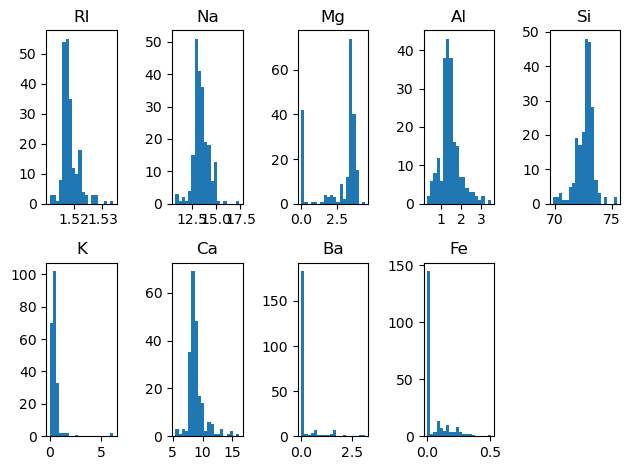

In [34]:
%matplotlib inline
for i in range(9):
    plt.subplot(2,5,i+1)
    plt.hist(np.array(data)[:,i],bins=20)
    plt.title(f'{list(headers)[i]}')
plt.tight_layout()
plt.show()

In [27]:
mean_vals = np.mean(data,axis=0)

In [28]:
std_vals = np.std(data)

In [29]:
normalized_data = data-mean_vals

In [30]:
normalized_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.002645,0.23215,1.805467,-0.344907,-0.870935,-0.437056,-0.206963,-0.175047,-0.057009
1,-0.000755,0.48215,0.915467,-0.084907,0.079065,-0.017056,-1.126963,-0.175047,-0.057009
2,-0.002185,0.12215,0.865467,0.095093,0.339065,-0.107056,-1.176963,-0.175047,-0.057009
3,-0.000705,-0.19785,1.005467,-0.154907,-0.040935,0.072944,-0.736963,-0.175047,-0.057009
4,-0.000945,-0.13785,0.935467,-0.204907,0.429065,0.052944,-0.886963,-0.175047,-0.057009
...,...,...,...,...,...,...,...,...,...
209,-0.002135,0.73215,-2.684533,1.435093,-0.040935,-0.417056,0.223037,0.884953,-0.057009
210,-0.001515,1.51215,-2.684533,0.545093,0.409065,-0.497056,-0.556963,1.414953,-0.057009
211,0.002285,0.95215,-2.684533,0.575093,0.769065,-0.497056,-0.516963,1.464953,-0.057009
212,-0.001855,0.97215,-2.684533,0.495093,0.959065,-0.497056,-0.476963,1.394953,-0.057009


In [36]:
standardized_data = normalized_data/std_vals
standardized_array = np.array(standardized_data)

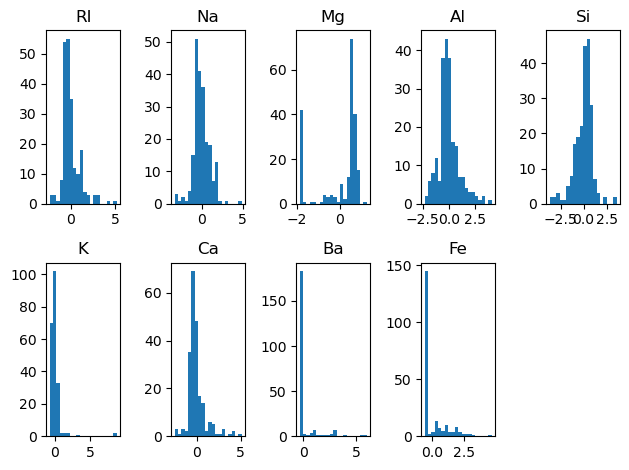

In [37]:
%matplotlib inline
for i in range(9):
    plt.subplot(2,5,i+1)
    plt.hist(standardized_array[:,i],bins=20)
    plt.title(f'{list(headers)[i]}')
plt.tight_layout()
plt.show()

In [ ]:
cov_matrix = np.cov(standardized_data.T)
cov_matrix

array([[ 1.00469484e+00, -1.92786249e-01, -1.22848096e-01,
        -4.09238363e-01, -5.44597046e-01, -2.91193428e-01,
         8.14207404e-01, -3.87831208e-04,  1.43681016e-01],
       [-1.92786249e-01,  1.00469484e+00, -2.75017087e-01,
         1.57529788e-01, -7.01365474e-02, -2.67335737e-01,
        -2.76735643e-01,  3.28136226e-01, -2.42479493e-01],
       [-1.22848096e-01, -2.75017087e-01,  1.00469484e+00,
        -4.84060474e-01, -1.66705721e-01,  5.42099905e-03,
        -4.45833360e-01, -4.94573208e-01,  8.34494798e-02],
       [-4.09238363e-01,  1.57529788e-01, -4.84060474e-01,
         1.00469484e+00, -5.54965338e-03,  3.27488767e-01,
        -2.60810752e-01,  4.81654624e-01, -7.47514567e-02],
       [-5.44597046e-01, -7.01365474e-02, -1.66705721e-01,
        -5.54965338e-03,  1.00469484e+00, -1.94238511e-01,
        -2.09712117e-01, -1.02630894e-01, -9.46429875e-02],
       [-2.91193428e-01, -2.67335737e-01,  5.42099905e-03,
         3.27488767e-01, -1.94238511e-01,  1.004694

Text(0, 0.5, 'Ca')

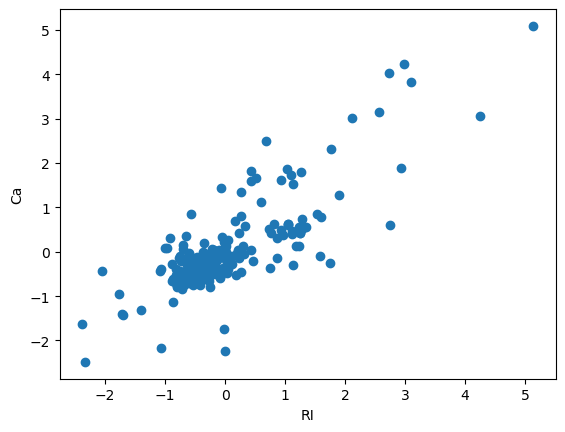

In [38]:
plt.plot(standardized_array[:,0],standardized_array[:,6],'o')
plt.xlabel('RI') ; plt.ylabel('Ca')

In [ ]:
eig_val, eig_vec = np.linalg.eig(cov_matrix)
print(f'Eigen values: {eig_val}\nEigenvectors: {eig_vec}')

Eigen values: [2.52295323e+00 2.05969694e+00 1.41143951e+00 1.16329842e+00
 9.18293337e-01 5.30112353e-01 3.70690643e-01 6.41527269e-02
 1.61637096e-03]
Eigenvectors: [[-0.54517662  0.28568318  0.08691083 -0.14738099  0.0735427  -0.11528772
  -0.08186724  0.7522159   0.02573194]
 [ 0.2581256   0.27035007 -0.38491962 -0.49124204 -0.1536833   0.55811757
  -0.14858006  0.12769315 -0.31193718]
 [-0.11088095 -0.59355826  0.00841796 -0.37878577 -0.12350912 -0.30818598
   0.20604537  0.07689061 -0.57727335]
 [ 0.42870863  0.29521154  0.32923712  0.13750592 -0.01410888  0.01885731
   0.69923557  0.27444105 -0.19222686]
 [ 0.22883635 -0.15509891 -0.45870884  0.65253771 -0.00850012 -0.08609797
  -0.21606658  0.37992298 -0.29807321]
 [ 0.21934405 -0.15397013  0.66257412  0.03853544  0.30703984  0.24363237
  -0.50412141  0.10981168 -0.26050863]
 [-0.49230609  0.3453798  -0.00098473  0.27644322  0.18818774  0.14866937
   0.09913463 -0.39870468 -0.57932321]
 [ 0.25037512  0.48470218  0.07405473 -0.1

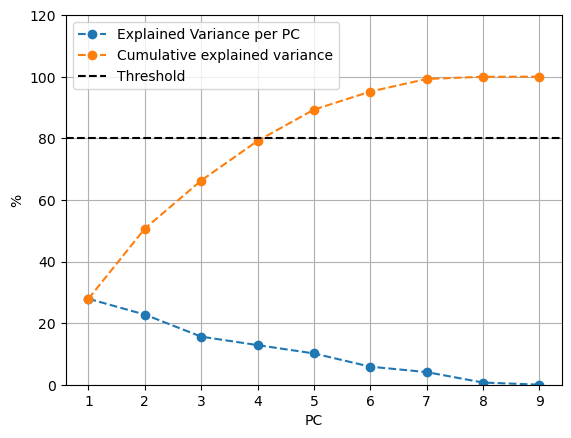

In [39]:
plt.plot((eig_val/np.sum(eig_val)*100),linestyle='--', marker='o')
plt.ylabel('%')
plt.xlabel('PC')


cum_data = np.cumsum(eig_val/np.sum(eig_val)*100)
plt.plot(cum_data,linestyle='--', marker='o',)
plt.ylim(0,120)

plt.axhline(80,linestyle='--',color='black')
plt.legend(['Explained Variance per PC','Cumulative explained variance','Threshold'])
plt.xticks(np.arange(0,9,1),np.arange(1,10,1))
plt.grid()
plt.show()

In [ ]:
PCA_base = eig_vec[:,0:4] 
# PCA_base

In [ ]:
projected_data = standardized_data@PCA_base   
# projected_data
labels == 4

In [50]:
sum(labels == 4)

0

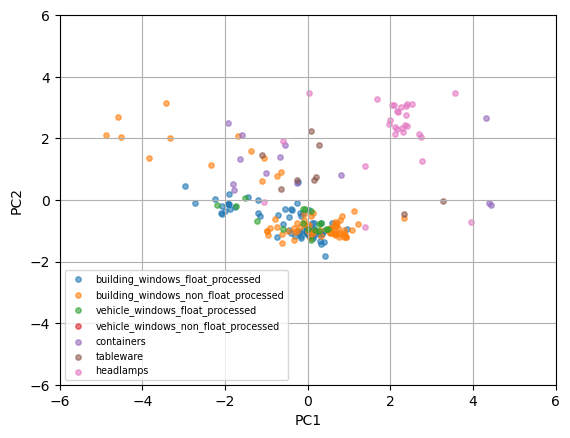

In [57]:
for i in range(7):
    plt.scatter(projected_data[0][np.array(labels == i+1)],projected_data[1][np.array(labels == i+1)],s=15,alpha=0.6)
    plt.legend(['building_windows_float_processed','building_windows_non_float_processed','vehicle_windows_float_processed','vehicle_windows_non_float_processed','containers','tableware','headlamps'],loc=3,fontsize='x-small')
    plt.grid()
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()

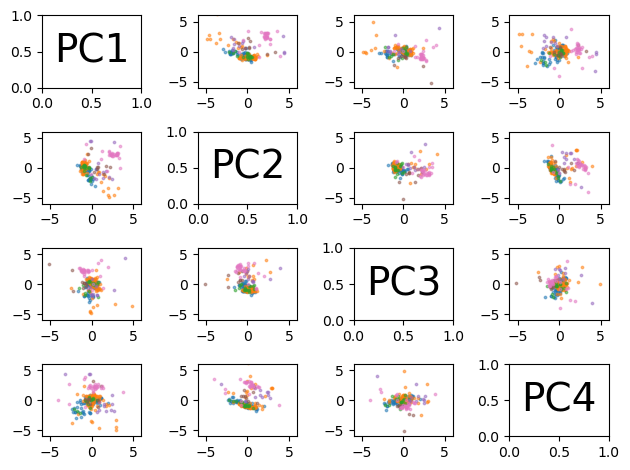

In [59]:
%matplotlib inline
text_kwargs = dict(ha='center', va='center', fontsize=28, color='black')

place = 1
pca_num = 0
for idx1 in range(4): 
    for idx in range(1,5,1):
        # print(f'Idx = {idx}')
        plt.subplot(4,4,place)
        if (place-1)%5 == 0:
            # plt.hist((projected_data[pca_num][np.array(labels == i)]),bins=25)
            pca_num +=1
            plt.text(0.5, 0.5, f'PC{pca_num}', **text_kwargs)


        else:
            for i in range(7):
                plt.scatter(projected_data[idx1][np.array(labels == i+1)],projected_data[idx-1][np.array(labels == i+1)],s=3,alpha=0.5)
                plt.xlim(-6,6)
                plt.ylim(-6,6)
        place += 1
plt.tight_layout()
plt.show()

# for i in range(4):
#     place = 5*i+1
#     plt.subplot(4,4,place)
#     plt.text(0, 0, f'PCA{i+1}', **text_kwargs)
# plt.show()

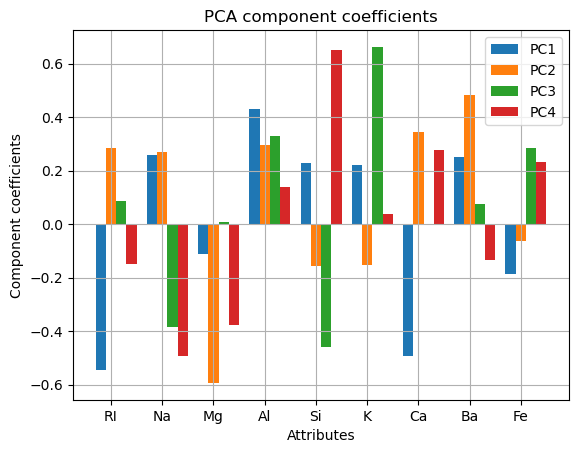

In [ ]:

rang = np.arange(1,10)
bar_width = 0.20
for i in range(4):
    plt.bar(rang+i*bar_width,PCA_base[:,i],width=bar_width)
plt.legend(['PC1','PC2','PC3','PC4'])
plt.grid()
plt.xticks(rang+bar_width,list(data.columns))
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.title('PCA component coefficients')
plt.show()

